In [1]:
import yfinance as yf
import pandas as pd

df = yf.download("MSFT", start="2020-01-01", end=pd.to_datetime('today').strftime('%Y-%m-%d'))
df.tail()

C:\Users\anany\AppData\Local\Temp\ipykernel_15472\2676735849.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("MSFT", start="2020-01-01", end=pd.to_datetime('today').strftime('%Y-%m-%d'))
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT
Date,,,,,
2025-08-12,529.239990,530.979980,522.700012,523.750000,18667000
2025-08-13,520.580017,532.700012,519.369995,532.109985,19619200
2025-08-14,522.479980,525.950012,520.140015,522.559998,20269100
2025-08-15,520.169983,526.099976,519.080017,522.770020,25213300
2025-08-18,517.099976,522.820007,514.020020,521.590027,23745000


In [2]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Target column (next day's 'Close' price)
df['target'] = df['Close'].shift(-1)
df.dropna(inplace=True)

features = ['Open', 'High', 'Low', 'Close', 'Volume']
target = ['target']

scaler_features = MinMaxScaler()
scaled_features = scaler_features.fit_transform(df[features])
scaler_target = MinMaxScaler()
scaled_target = scaler_target.fit_transform(df[target])

split_index = int(0.8 * len(df)) #linear splitting
X_train, X_test = scaled_features[:split_index], scaled_features[split_index:]
y_train, y_test = scaled_target[:split_index], scaled_target[split_index:]

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1)) 

model.compile(optimizer='adam', loss='mse')

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)




Epoch 1/50

29/29 [==============================] - 1s 5ms/step - loss: 0.0364 - val_loss: 0.0113
Epoch 2/50
29/29 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0087
Epoch 3/50
29/29 [==============================] - 0s 2ms/step - loss: 5.4373e-04 - val_loss: 0.0034
Epoch 4/50
29/29 [==============================] - 0s 2ms/step - loss: 3.8605e-04 - val_loss: 0.0022
Epoch 5/50
29/29 [==============================] - 0s 2ms/step - loss: 3.0818e-04 - val_loss: 0.0021
Epoch 6/50
29/29 [==============================] - 0s 2ms/step - loss: 2.5437e-04 - val_loss: 0.0015
Epoch 7/50
29/29 [==============================] - 0s 2ms/step - loss: 2.1706e-04 - val_loss: 0.0014
Epoch 8/50
29/29 [==============================] - 0s 2ms/step - loss: 1.8448e-04 - val_loss: 0.0011
Epoch 9/50
29/29 [==============================] - 0s 2ms/step - loss: 1.6273e-04 - val_loss: 9.8260e-04
Epoch 10/50
29/29 [==============================] - 0s 2ms/step - loss: 1.5434e-0

In [4]:
predictions = model.predict(X_test)

predicted_prices = scaler_target.inverse_transform(predictions)
actual_prices = scaler_target.inverse_transform(y_test)

9/9 [==============================] - 0s 426us/step


In [5]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(actual_prices, predicted_prices)
print(f"Mean Absolute Error on test data: {mae}")

Mean Absolute Error on test data: 16.592590655539137


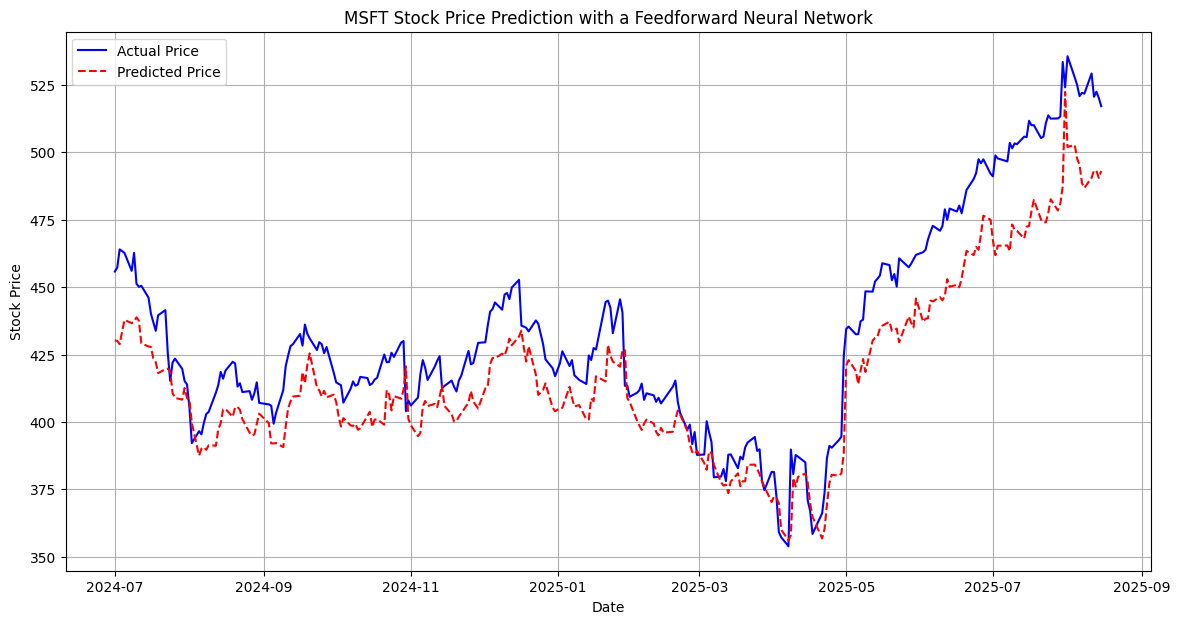

In [6]:
import matplotlib.pyplot as plt

results_df = pd.DataFrame({
    'Actual Price': actual_prices.flatten(),
    'Predicted Price': predicted_prices.flatten()
}, index=df.index[split_index:])

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(results_df['Actual Price'], label='Actual Price', color='blue')
plt.plot(results_df['Predicted Price'], label='Predicted Price', color='red', linestyle='--')
plt.title('MSFT Stock Price Prediction with a Feedforward Neural Network')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
#significant lag in predictions
#constant under-estimation
#main issue: lack of sequential context